<a href="https://colab.research.google.com/github/Hiteshwalia4/Sem_3_MCA/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Practical 2
# Multiple Linear Regression ( 4 independent and 1 dependent variable)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("energydata.csv")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.isnull()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4094,False,False,False,False,False
4095,False,False,False,False,False
4096,False,False,False,False,False
4097,False,False,False,False,False


In [5]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.shape

(4099, 5)

In [7]:
df=df.dropna()
df.shape

(4099, 5)

In [8]:
x=df.iloc[:,:-1].values
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  18.88,   65.94, 1010.43,   85.54],
       [  24.18,   59.92, 1009.88,   79.54],
       [  19.19,   50.16, 1011.12,   99.91]])

In [9]:
y=df.iloc[:,-1].values
y

array([463.26, 444.37, 488.56, ..., 445.61, 438.85, 449.52])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
print(x_train)
print(x_train.shape)

[[  22.84   50.05 1005.59   79.49]
 [   7.26   40.69 1020.43   90.22]
 [  25.24   68.67 1006.76   76.95]
 ...
 [   9.05   40.67 1015.57   75.48]
 [  16.4    44.9  1009.22   82.31]
 [  12.26   41.5  1014.87   89.41]]
(3279, 4)


In [15]:
print(x_test)
print(x_test.shape)

[[  26.71   66.25 1008.11   79.28]
 [  27.33   73.18 1012.26   82.18]
 [  25.95   59.92 1010.05   76.05]
 ...
 [  19.46   66.86 1012.74   66.2 ]
 [  32.81   75.08 1005.09   42.  ]
 [  18.9    57.5  1016.21   93.9 ]]
(820, 4)


In [16]:
print(y_train)
print(y_train.shape)

[442.85 474.91 442.29 ... 486.55 456.11 471.13]
(3279,)


In [17]:
print(y_test)
print(y_test.shape)

[435.41 429.38 443.93 455.04 432.51 454.03 445.3  485.87 480.8  477.86
 482.25 445.83 427.21 456.27 473.99 429.12 436.15 448.   451.88 475.98
 427.71 447.65 442.84 489.18 434.58 431.92 451.44 481.18 469.57 461.99
 443.79 463.46 460.21 431.33 471.99 438.31 462.18 440.66 440.13 432.8
 436.65 448.46 452.52 459.4  439.22 447.46 450.33 469.8  460.26 434.64
 445.78 453.12 445.92 427.06 483.56 437.31 450.57 488.05 466.64 447.01
 433.89 457.45 428.79 433.43 429.36 433.74 439.8  442.48 491.23 463.58
 474.3  434.75 460.19 441.21 464.67 440.86 440.09 442.57 439.84 448.03
 475.36 452.89 433.99 440.6  454.39 477.52 483.59 446.47 466.15 434.78
 452.82 441.33 427.1  481.18 467.01 450.53 435.84 469.93 438.52 439.71
 469.25 432.64 473.43 447.36 432.71 466.49 439.51 442.13 450.98 465.62
 463.82 437.59 431.76 441.99 438.9  448.65 444.82 445.91 437.55 444.78
 437.91 473.   439.91 476.02 432.2  473.76 460.22 450.88 447.58 452.73
 437.18 465.43 432.21 467.25 446.82 469.4  430.5  447.92 429.5  450.22
 472.2 

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=reg.predict(x_test)
y_pred

array([436.17758248, 433.18680739, 439.75253532, 455.99801342,
       429.03581509, 455.13706738, 434.14439308, 479.11182518,
       478.06757364, 481.47803358, 482.65357746, 447.60034379,
       437.32839094, 457.13337611, 476.49855781, 432.48514416,
       432.21284585, 452.10905267, 450.09089977, 472.18526947,
       434.81544498, 445.49609337, 448.12855096, 481.81186934,
       440.42870887, 426.06993438, 453.27805357, 479.14640208,
       466.93268754, 456.66671875, 446.26710274, 464.30185955,
       461.26459976, 431.18191207, 467.54159027, 434.27925636,
       464.35262236, 443.66395916, 437.53439345, 440.30036577,
       433.31863172, 448.06590252, 453.89386074, 458.18592583,
       442.13379455, 450.08215066, 454.12317517, 465.67161169,
       451.53974079, 433.72159517, 445.33450844, 458.5008813 ,
       437.96369465, 426.1900916 , 483.65960814, 433.93020013,
       450.6868716 , 487.74877355, 470.78269782, 444.00437492,
       439.5428154 , 463.99015481, 436.27907141, 434.91

In [20]:
# Difference b/w predicted values and actual values
y_pred-y_test

array([ 7.67582478e-01,  3.80680739e+00, -4.17746468e+00,  9.58013425e-01,
       -3.47418491e+00,  1.10706738e+00, -1.11556069e+01, -6.75817482e+00,
       -2.73242636e+00,  3.61803358e+00,  4.03577461e-01,  1.77034379e+00,
        1.01183909e+01,  8.63376113e-01,  2.50855781e+00,  3.36514416e+00,
       -3.93715415e+00,  4.10905267e+00, -1.78910023e+00, -3.79473053e+00,
        7.10544498e+00, -2.15390663e+00,  5.28855096e+00, -7.36813066e+00,
        5.84870887e+00, -5.85006562e+00,  1.83805357e+00, -2.03359792e+00,
       -2.63731246e+00, -5.32328125e+00,  2.47710274e+00,  8.41859545e-01,
        1.05459976e+00, -1.48087931e-01, -4.44840973e+00, -4.03074364e+00,
        2.17262236e+00,  3.00395916e+00, -2.59560655e+00,  7.50036577e+00,
       -3.33136828e+00, -3.94097480e-01,  1.37386074e+00, -1.21407417e+00,
        2.91379455e+00,  2.62215066e+00,  3.79317517e+00, -4.12838831e+00,
       -8.72025921e+00, -9.18404832e-01, -4.45491564e-01,  5.38088130e+00,
       -7.95630535e+00, -

In [21]:
#Evaluating accuracy of model
# 1. Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mAbErr=mean_absolute_error(y_test,y_pred)
print(mAbErr)

3.552984138301056


In [22]:
# 2. Mean Squared Error
from sklearn.metrics import mean_squared_error
mSqErr=mean_squared_error(y_test,y_pred)
print(mSqErr)

19.63626393554927


In [24]:
# 3. R Sqaure
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9342407190599091


In [25]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.843499,-0.506633,-0.534284,-0.948108
V,0.843499,1.000000,-0.413651,-0.305699,-0.866627
AP,-0.506633,-0.413651,1.000000,0.092392,0.521825
RH,-0.534284,-0.305699,0.092392,1.000000,0.378381
PE,-0.948108,-0.866627,0.521825,0.378381,1.000000


<Axes: >

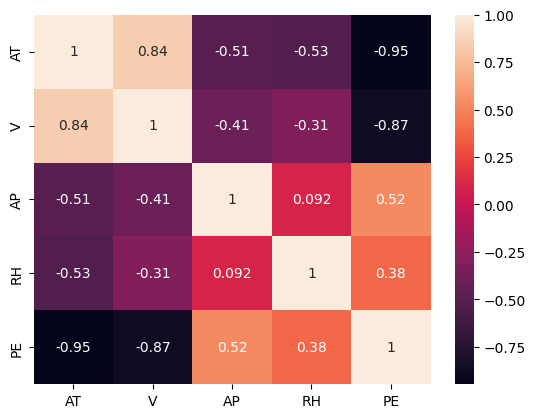

In [27]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)